In [34]:
# Hii This is Made By Raajshekhar Rajan (Delhi Technological University)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [35]:
# In this cell we are importing data from our dataset 
data = pd.read_csv("data/imdb_top_1000.csv")
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [36]:
# In this cell we are cleaning data from our dataset 
data['Gross'] = data['Gross'].replace('[\$,]', '', regex=True).astype(float)
data['Runtime'] = data['Runtime'].str.extract('(\d+)').astype(float)
data['Meta_score'] = pd.to_numeric(data['Meta_score'], errors='coerce')
data.dropna(subset=['Gross'], inplace=True)

In [37]:
X = data[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Runtime']]
y = data['Gross']

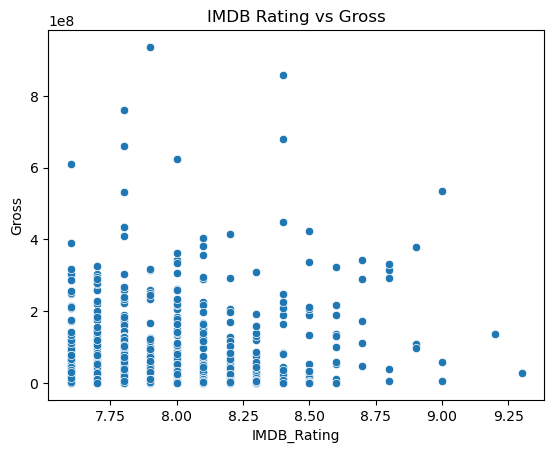

In [38]:
sns.scatterplot(x='IMDB_Rating', y='Gross', data=data)
plt.title("IMDB Rating vs Gross")
plt.show()

In [39]:
# LR Model
features = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Runtime']
data = pd.concat([X, y], axis=1)
data = data.dropna()

# Split again
X = data[features]
y = data['Gross']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.36726716212861066
RMSE: 100311798.63123035


In [41]:
# In this cell have taken random value to check our model
sample = pd.DataFrame([[8.2, 75, 250000, 135]], columns=['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Runtime'])
predicted_gross = model.predict(sample)
print("Predicted Gross: $", round(predicted_gross[0], 2))

Predicted Gross: $ 14494337.88
